In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv("/Users/tracysanchezpacheco/Desktop/Agent_Sessions.csv")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


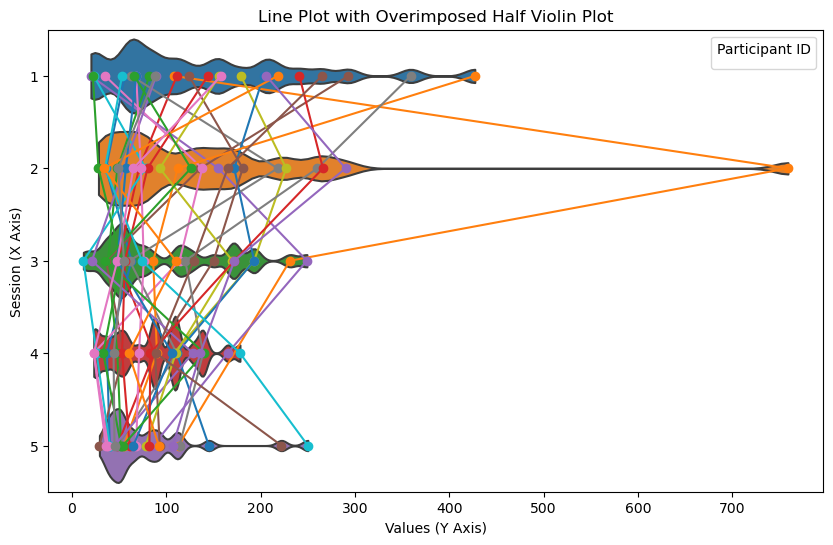

In [13]:
# Create the line plot
plt.figure(figsize=(10, 6))
for id in df['id'].unique():
    subset = df[df['id'] == id]
    plt.plot(subset['y_axis'], subset['x_axis'] - 1, marker='o') # Swapped axes


# Create the half violin plot (horizontal)
sns.violinplot(y='x_axis', x='y_axis', data=df,split=True, scale='width', inner=None, cut=0, bw=0.1, orient='h')

plt.ylabel('Session (X Axis)')
plt.xlabel('Values (Y Axis)')
plt.title('Line Plot with Overimposed Half Violin Plot')
plt.legend(title='Participant ID')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


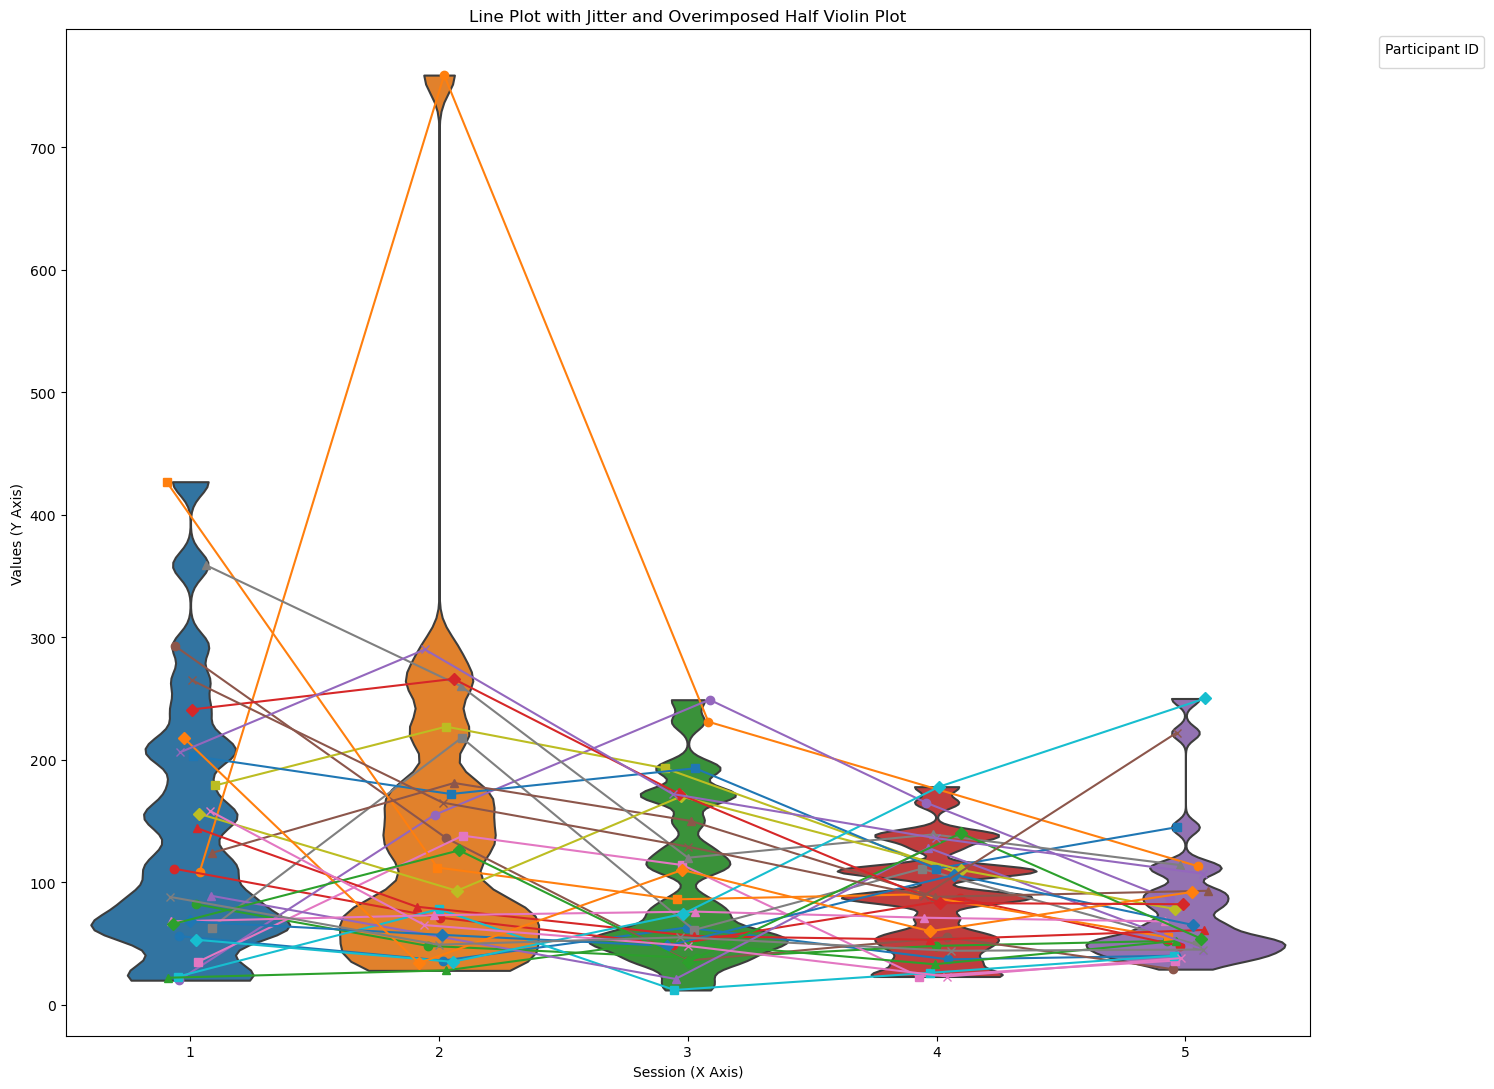

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming you have a DataFrame 'df' with columns 'id', 'x_axis', and 'y_axis'
# df = pd.read_csv('your_data_file.csv')

# Define a set of line, marker styles, and marker sizes
line_styles = ['-', '--', '-.', ':']
marker_styles = ['o', 's', '^', 'D', 'x', 'P', '*', 'H', '+', '1']
marker_sizes = [5, 6, 7, 8, 9, 10]  # Different sizes

# Create a list of combinations of styles and sizes
styles = [(line, marker, size) for line in line_styles for marker in marker_styles for size in marker_sizes]

# Create the line plot with different textures and jitter
plt.figure(figsize=(15, 11))
jitter_amount = 0.1  # Adjust the amount of jitter here
for idx, id in enumerate(df['id'].unique()):
    subset = df[df['id'] == id].copy()
    jitter = np.random.uniform(-jitter_amount, jitter_amount, size=len(subset))
    subset['x_axis_jittered'] = subset['x_axis'] - 1 + jitter

    line_style, marker_style, marker_size = styles[idx % len(styles)]
    plt.plot(subset['x_axis_jittered'], subset['y_axis'], linestyle=line_style, marker=marker_style)

# Adjust x-axis limits
plt.xlim(0.5, 5.5)  # Adjust as needed

# Create the half violin plot (vertical)
sns.violinplot(x='x_axis', y='y_axis', data=df, scale='width', inner=None, cut=0, bw=0.1)

plt.xlabel('Session (X Axis)')
plt.ylabel('Values (Y Axis)')
plt.title('Line Plot with Jitter and Overimposed Half Violin Plot')
plt.legend(title='Participant ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


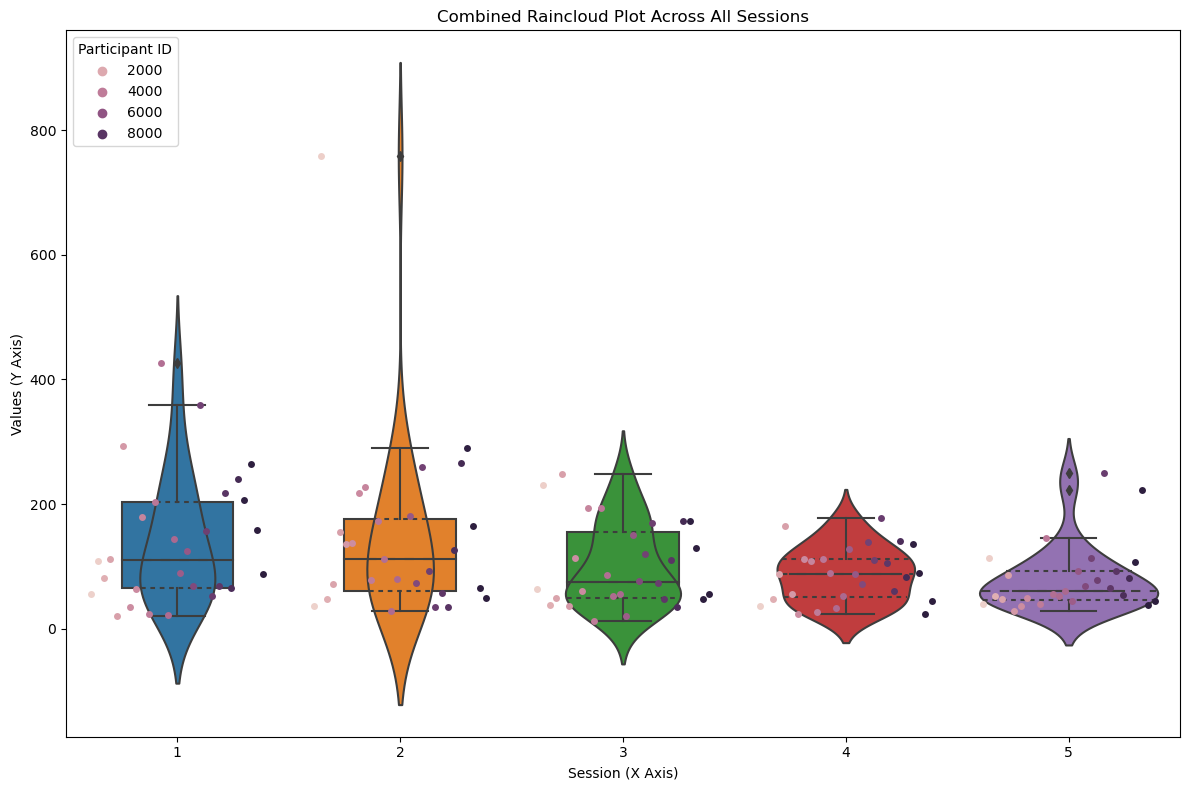

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have a DataFrame 'df' with columns 'id', 'x_axis', 'y_axis'
# df = pd.read_csv('your_data_file.csv')

plt.figure(figsize=(12, 8))

# Create the combined plot
swarm = sns.swarmplot(x='x_axis', y='y_axis', data=df, hue='id', dodge=True, alpha=1)
box = sns.boxplot(x='x_axis', y='y_axis', data=df, width=0.5)
violin = sns.violinplot(x='x_axis', y='y_axis', data=df, split=True, inner="quart")

# Adjust transparency (you may need to define set_boxplot_alpha and setAlpha functions based on your needs)
# set_boxplot_alpha(plt.gca(), 0.4)
# setAlpha(plt.gca(), 0.3)

plt.title('Combined Raincloud Plot Across All Sessions')
plt.xlabel('Session (X Axis)')
plt.ylabel('Values (Y Axis)')
plt.legend(title='Participant ID', loc='upper left')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


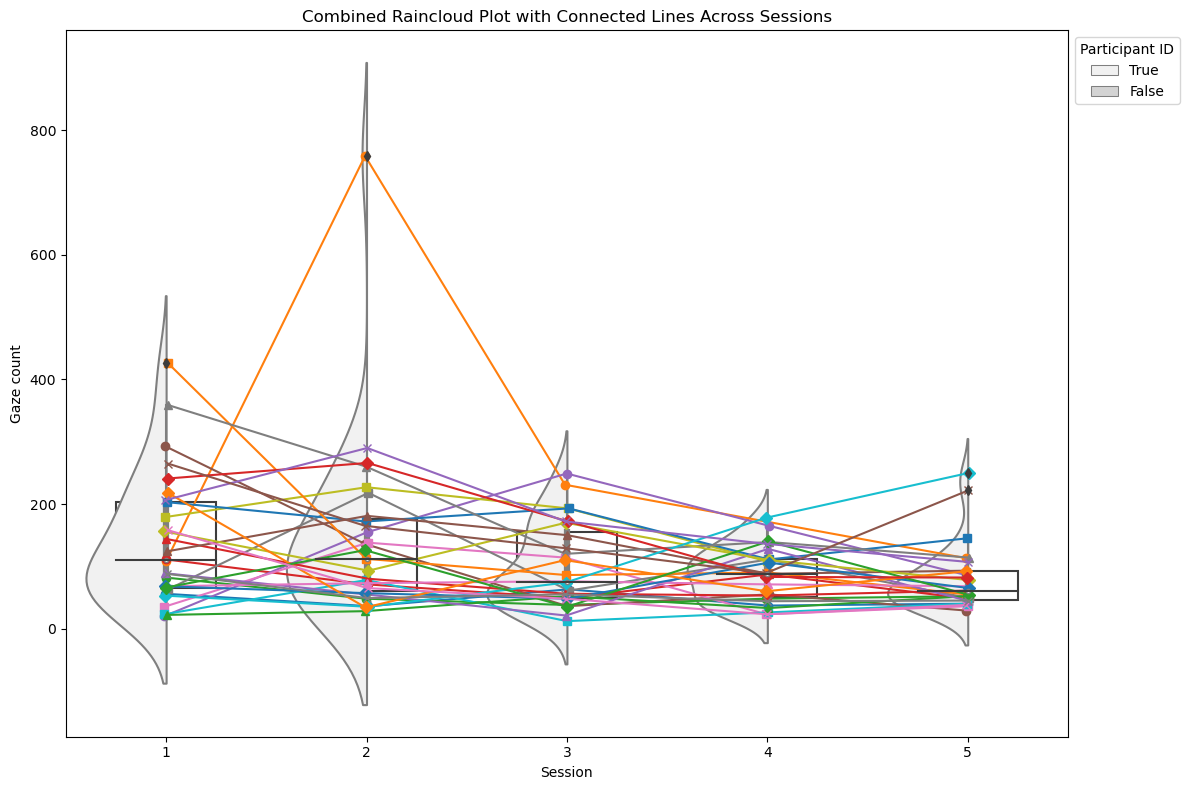

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have a DataFrame 'df' with columns 'id', 'x_axis', and 'y_axis'
# df = pd.read_csv('your_data_file.csv')

plt.figure(figsize=(12, 8))

# Create the combined plot with swarm, box, and violin plots
#swarm = sns.swarmplot(x='x_axis', y='y_axis', data=df, hue='id', dodge=True, )
box = sns.boxplot(x='x_axis', y='y_axis', data=df, width=0.5, showcaps=False, boxprops={'facecolor':'None'}, whiskerprops={'linewidth':0}, zorder=10)
violin = sns.violinplot(x='x_axis', y='y_axis', data=df, hue=True,
    hue_order=[True, False], split=True,  color='lightgrey', zorder=5)

# Define a set of line, marker styles, and marker sizes
line_styles = ['-', '--', '-.', ':']
marker_styles = ['o', 's', '^', 'D', 'x', 'P', '*', 'H', '+', '1']
marker_sizes = [5, 6, 7, 8, 9, 10]  # Different sizes

# Create a list of combinations of styles and sizes
styles = [(line, marker, size) for line in line_styles for marker in marker_styles for size in marker_sizes]

jitter_amount = 0.01  # Adjust the amount of jitter here
for idx, id in enumerate(df['id'].unique()):
    subset = df[df['id'] == id].copy()
    jitter = np.random.uniform(-jitter_amount, jitter_amount, size=len(subset))
    subset['x_axis_jittered'] = subset['x_axis'] - 1 + jitter

    line_style, marker_style, marker_size = styles[idx % len(styles)]
    plt.plot(subset['x_axis_jittered'], subset['y_axis'], linestyle=line_style, marker=marker_style)

plt.title('Combined Raincloud Plot with Connected Lines Across Sessions')
plt.xlabel('Session')
plt.ylabel('Gaze count')

# Adjust legend
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles[:len(df['id'].unique())], labels[:len(df['id'].unique())], title='Participant ID', loc='upper left', bbox_to_anchor=(1, 1))

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


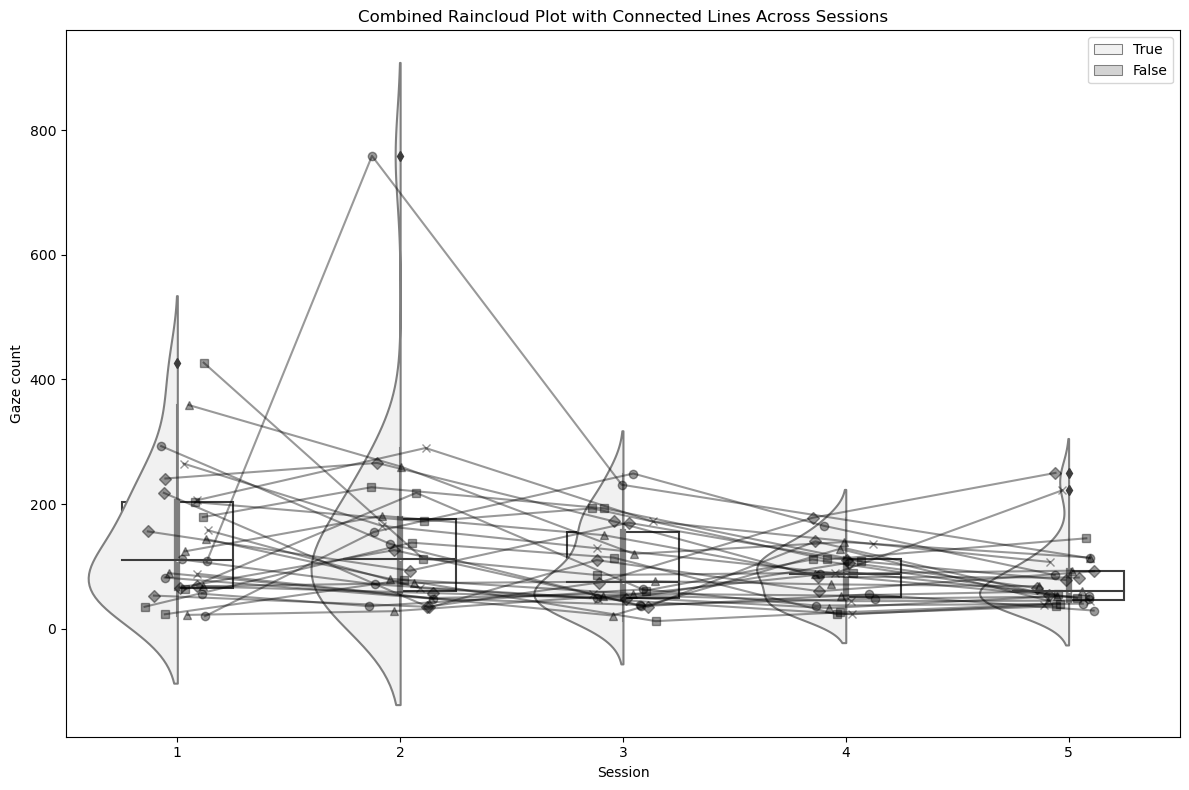

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming you have a DataFrame 'df' with columns 'id', 'x_axis', and 'y_axis'
# df = pd.read_csv('your_data_file.csv')

plt.figure(figsize=(12, 8))

# Create the combined plot with box and violin plots
box = sns.boxplot(x='x_axis', y='y_axis', data=df, width=0.5, showcaps=False, boxprops={'facecolor':'None'}, whiskerprops={'linewidth':0}, zorder=10)
violin = sns.violinplot(x='x_axis', y='y_axis', data=df, hue=True,
    hue_order=[True, False], split=True, color='lightgrey', zorder=5)

# Define a set of line and marker styles
line_styles = ['-', '--', '-.', ':']
marker_styles = ['o', 's', '^', 'D', 'x', 'P', '*', 'H', '+', '1']
marker_sizes = [5, 6, 7, 8, 9, 10]  # Different sizes

# Create a list of combinations of styles and sizes
styles = [(line, marker, size) for line in line_styles for marker in marker_styles for size in marker_sizes]

# Add jitter for each participant
jitter_amount = 0.15  # Adjust the amount of jitter here
for idx, id in enumerate(df['id'].unique()):
    subset = df[df['id'] == id].copy()
    jitter = np.random.uniform(-jitter_amount, jitter_amount, size=len(subset))
    subset['x_axis_jittered'] = subset['x_axis'] - 1 + jitter
    line_style, marker_style, marker_size = styles[idx % len(styles)]
    plt.plot(subset['x_axis_jittered'], subset['y_axis'], linestyle=line_style, marker=marker_style, color='black', alpha=0.4)

plt.title('Combined Raincloud Plot with Connected Lines Across Sessions')
plt.xlabel('Session')
plt.ylabel('Gaze count')

# Adjust legend
handles, labels = plt.gca().get_legend_handles_labels()
# Update legend to reflect only textures, not color
#plt.legend(handles[:len(styles)], [f'ID {id}' for id in df['id'].unique()], title='Participant ID', loc='upper left', bbox_to_anchor=(1, 1))

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


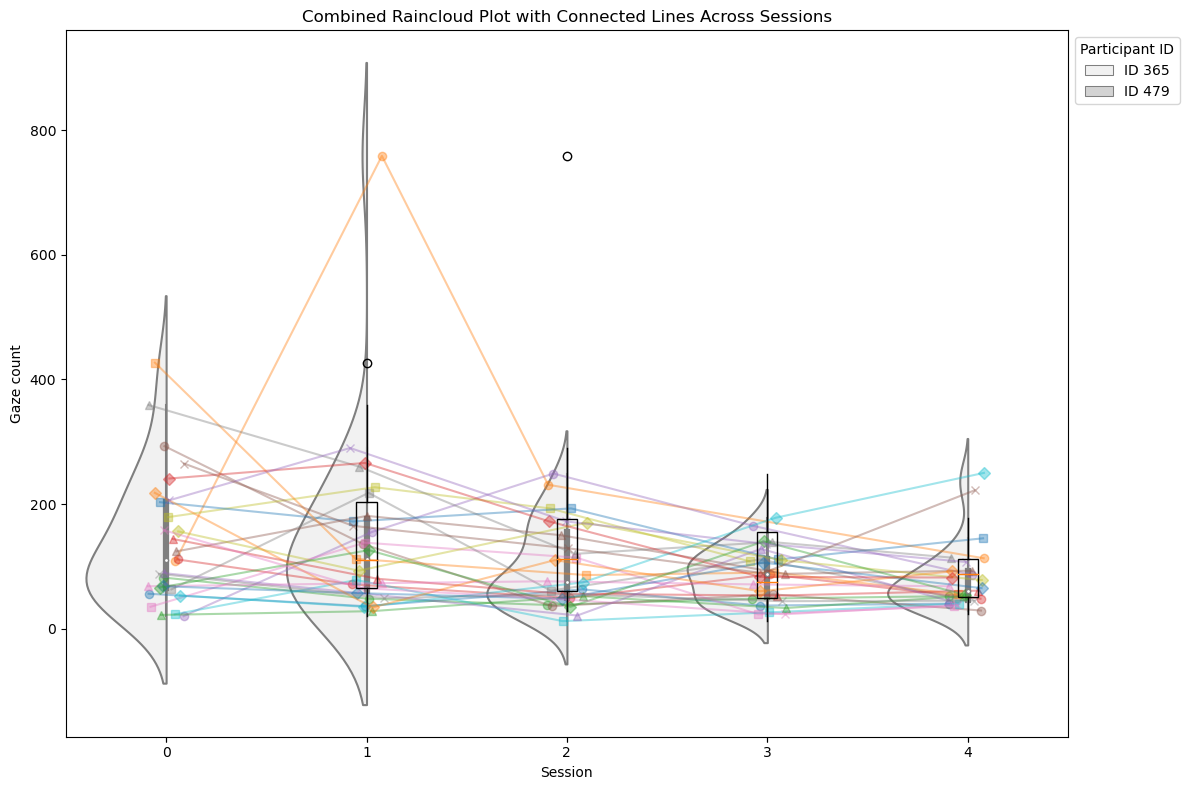

In [53]:


plt.figure(figsize=(12, 8))

# Create the half violin plot
violin = sns.violinplot(x='x_axis', y='y_axis', data=df, hue=True, hue_order=[True, False], split=True, color='lightgrey', zorder=5)

# Create the box plot with Matplotlib for more control
box_width = 0.1  # Adjust the width of the box plot
for i in df['x_axis'].unique():
    subset = df[df['x_axis'] == i - 1]['y_axis']
    # Using patch_artist=True to support facecolor
    bplot = plt.boxplot(subset, positions=[i -1], widths=box_width, patch_artist=True, showcaps=False, zorder=10)
    # Setting the facecolor to None for transparency
    for patch in bplot['boxes']:
        patch.set(facecolor='None')

# Define a set of line, marker styles, and marker sizes
line_styles = ['-', '--', '-.', ':']
marker_styles = ['o', 's', '^', 'D', 'x', 'P', '*', 'H', '+', '1']
marker_sizes = [5, 6, 7, 8, 9, 10]  # Different sizes

# Corrected list comprehension for styles
styles = [(line, marker, size) for line in line_styles for marker in marker_styles for size in marker_sizes]

# Add jitter for each participant
jitter_amount = 0.1  # Adjust the amount of jitter here
for idx, id in enumerate(df['id'].unique()):
    subset = df[df['id'] == id].copy()
    jitter = np.random.uniform(-jitter_amount, jitter_amount, size=len(subset))
    subset['x_axis_jittered'] = subset['x_axis'] - 1 + jitter

    line_style, marker_style, marker_size = styles[idx % len(styles)]
    plt.plot(subset['x_axis_jittered'], subset['y_axis'], linestyle=line_style, marker=marker_style,  alpha=0.4)

plt.title('Combined Raincloud Plot with Connected Lines Across Sessions')
plt.xlabel('Session')
plt.ylabel('Gaze count')

# Adjust legend
handles, labels = plt.gca().get_legend_handles_labels()
# Update legend to reflect only textures, not color
plt.legend(handles[:len(styles)], [f'ID {id}' for id in df['id'].unique()], title='Participant ID', loc='upper left', bbox_to_anchor=(1, 1))

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


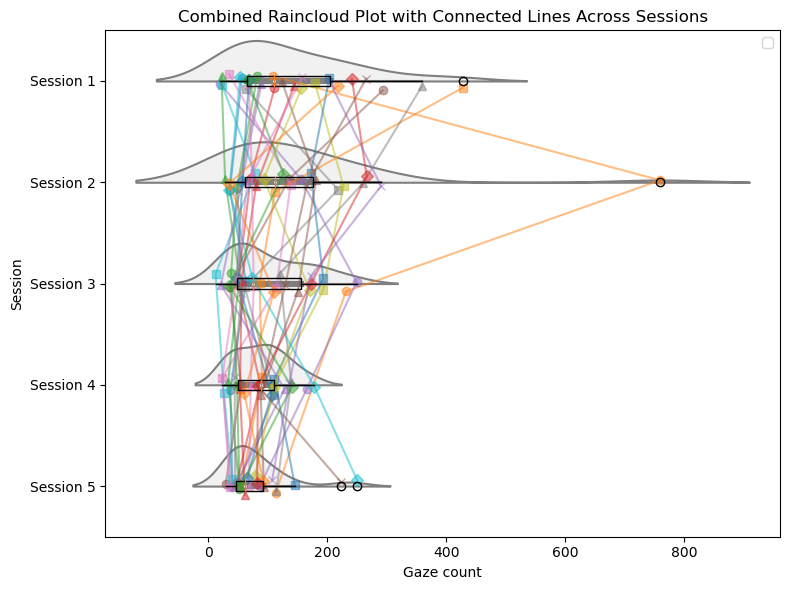

In [96]:
plt.figure(figsize=(8, 6))

# Create the half violin plot horizontally
violin = sns.violinplot(x='y_axis', y='x_axis',  data=df, hue=True, hue_order=[True, False], split=True, color='lightgrey', orient='h')

# Create the horizontal box plot with Matplotlib for more control
box_width = 0.1  # Adjust the width of the box plot
for i in df['x_axis'].unique():
    subset = df[df['x_axis'] == i]['y_axis']
    # Using patch_artist=True to support facecolor
    bplot = plt.boxplot(subset, positions=[i - 1] , widths=box_width, patch_artist=True, showcaps=False, zorder=10, vert=False)
    # Setting the facecolor to None for transparency
    for patch in bplot['boxes']:
        patch.set(facecolor='None')

# Define a set of line, marker styles, and marker sizes
line_styles = ['-', '--', '-.', ':']
marker_styles = ['o', 's', '^', 'D', 'x', 'P', '*', 'H', '+', '1']
marker_sizes = [5, 6, 7, 8, 9, 10]  # Different sizes

# Corrected list comprehension for styles
styles = [(line, marker, size) for line in line_styles for marker in marker_styles for size in marker_sizes]

# Add jitter for each participant
jitter_amount = 0.1  # Adjust the amount of jitter here
for idx, id in enumerate(df['id'].unique()):
    subset = df[df['id'] == id].copy()
    jitter = np.random.uniform(-jitter_amount, jitter_amount, size=len(subset))
    subset['x_axis_jittered'] = subset['x_axis']  + jitter

    line_style, marker_style, marker_size = styles[idx % len(styles)]
    plt.plot(subset['y_axis'] , subset['x_axis_jittered'] -1, linestyle=line_style, marker=marker_style, alpha=0.5)

plt.title('Combined Raincloud Plot with Connected Lines Across Sessions')
plt.ylabel('Session')
plt.xlabel('Gaze count')

plt.yticks([0, 1, 2, 3, 4], ['Session 1', 'Session 2', 'Session 3', "Session 4", "Session 5"],)

# Adjust layout
plt.tight_layout()
plt.legend([])
# Show the plot
plt.show()


In [86]:
np.arange(1, 6)

array([1, 2, 3, 4, 5])

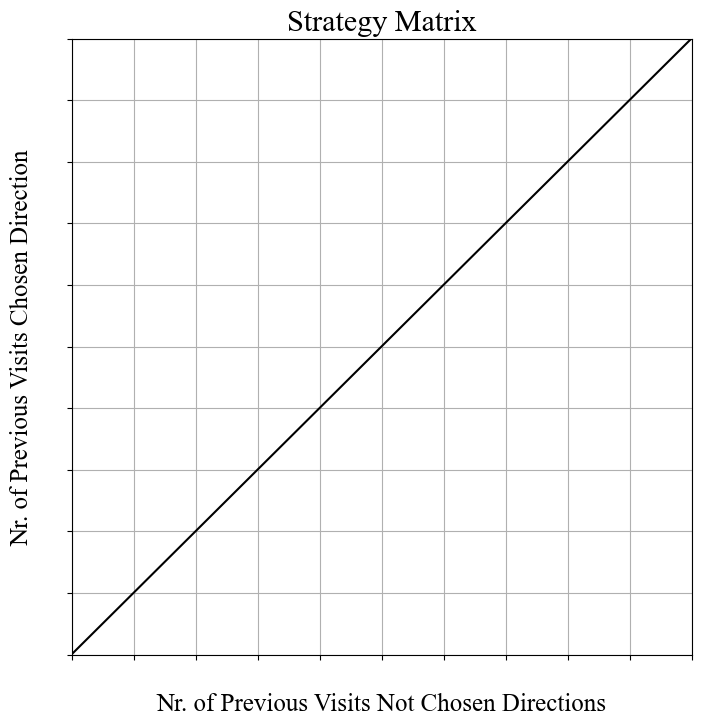

In [20]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 18
# Define the matrix size
matrix_size = 11  # For 0 to 10 inclusive

# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 8))

# Create a grid to look like a matrix
ax.set_xticks(np.arange(0, matrix_size, 1))
ax.set_yticks(np.arange(0, matrix_size, 1))
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.grid(which='both')

# Draw the diagonal line
ax.plot(np.arange(matrix_size), np.arange(matrix_size), ls="-", color="black")

# Set the axis limits
ax.set_xlim(0, matrix_size - 1)
ax.set_ylim(0, matrix_size - 1)

# Set labels
ax.set_xlabel('Nr. of Previous Visits Not Chosen Directions', labelpad=20)
ax.set_ylabel('Nr. of Previous Visits Chosen Direction', labelpad=20)

# Set title
ax.set_title('Strategy Matrix')

# Show the plot

plt.savefig("/Volumes/TwoTeras/2_DataSets_Experiments_1_2/Plots/Decision_Matrix.png",  bbox_inches="tight",
            pad_inches=0.3)
plt.show()

In [4]:
import 
# Create an 11x11 matrix of zeros
matrix_size = 11  # This gives us a range from 0 to 10 inclusive
matrix = np.zeros((matrix_size, matrix_size))

# Populate the diagonal
# np.fill_diagonal(matrix, 1) # This is another way to fill the diagonal
for i in range(matrix_size):
    matrix[i, i] = 1  # This sets 1s on the diagonal

# Print the matrix
print(matrix)

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
